
**Student Name**: Yingpeng Zhang

**Student Number**: 1004149085


# Libraries

In [1]:
import numpy as np
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings('ignore')

# Introduction
In this project, cleaned data from midterm project is used as a starter. For each of the tables, some key relationoships and features will be explored visually by following the Tufte's Principles during this project. Also, summarizations and pictures for whole populations will be shown. In the first section, dataframes are prepared by reusing code from previous project. During the second section, informative plots for each table will be generated and shown for observation. After that, the Tufte's principles will be discussed to verify that the plots are legit. 

# Dataframes

In [2]:
# import excel
excel_file = 'UN_MigrantStockTotal_2015.xlsx'

In [3]:
# import excel Contents sheet
df0 = pd.read_excel(excel_file,sheet_name= 'CONTENTS',
                    header=14,names = ['TABLE','TITLE'],
                    converters={'TABLE':str,'TITLE':str})

## Table 1

In [4]:
# import excel Table 1
df1 = pd.read_excel(excel_file,sheet_name= 'Table 1',header=14,
                    names = ['Sort','Major_area_region_country',
                             'Notes','Country_code','Type_of_data',
                             'both_1990','both_1995','both_2000',
                             'both_2005','both_2010','both_2015',
                             'male_1990','male_1995','male_2000',
                             'male_2005','male_2010','male_2015',
                             'fema_1990','fema_1995','fema_2000',
                             'fema_2005','fema_2010','fema_2015'],
                    converters={'Sort':str,'Country_code':str})
# drop the first row and replace the missing value as 0
df1 = df1.drop(df1.index[0])
df1['Type_of_data'].fillna(0, inplace=True)
df1['Notes'].fillna(0, inplace=True)
df1notes = df1.drop(['both_1990','both_1995','both_2000',
                     'both_2005','both_2010','both_2015',
                     'male_1990','male_1995','male_2000',
                     'male_2005','male_2010','male_2015',
                     'fema_1990','fema_1995','fema_2000',
                     'fema_2005','fema_2010','fema_2015'], axis=1)
df1 = df1.drop(['Notes','Type_of_data'], axis=1)
df1 = df1.melt(id_vars=['Sort','Major_area_region_country','Country_code'], 
               var_name=["demographic"],value_name="stock") #implicit typing
df1=(df1.assign(gender = lambda x: x.demographic.str[0:4].astype(str), 
                year = lambda x: x.demographic.str[5:9].astype(str)).drop("demographic",axis=1))
df1.gender[df1.gender == 'fema'] = 'female'
# No cell value should contain missing values
df1 = df1.drop(df1[df1.stock == '..'].index)
df1.dropna(inplace=True)

## Table 2

In [5]:
# Table 2 import excel  total population
# import excel sheet 1
df2 = pd.read_excel(excel_file,sheet_name= 'Table 2',header=14,
                    names = ['Sort','Major_area_region_country','Notes',
                             'Country_code', 'both_1990','both_1995','both_2000',
                             'both_2005','both_2010','both_2015','male_1990',
                             'male_1995','male_2000','male_2005','male_2010',
                             'male_2015','fema_1990','fema_1995','fema_2000',
                             'fema_2005','fema_2010','fema_2015'],
                    converters={'Sort':str,'Country_code':str})
# Column names need to be informative, variable names and not values
# drop the first row and Notes column
df2 = df2.drop(['Notes'], axis=1)
df2 = df2.drop(df1.index[0])
df2 = df2.melt(id_vars=['Sort','Major_area_region_country','Country_code'], 
               var_name=["demographic"],value_name="population") #implicit typing
# No cell value should contain missing values
df2 = df2.drop(df2[df2.population == '..'].index)
df2.dropna(inplace=True)
df2=(df2.assign(gender = lambda x: x.demographic.str[0:4].astype(str), 
                year = lambda x: x.demographic.str[5:9].astype(str)).drop("demographic",axis=1))
df2.gender[df2.gender == 'fema'] = 'female'

## Table 3

In [6]:
# import excel Table 3
df3 = pd.read_excel(excel_file, sheet_name='Table 3', header=14,
                    names=['Sort', 'Major_area_region_country', 'Notes',
                           'Country_code','Type_of_data', 'both_1990',
                           'both_1995', 'both_2000', 'both_2005',
                           'both_2010', 'both_2015', 'male_1990', 
                           'male_1995','male_2000', 'male_2005', 'male_2010', 
                           'male_2015', 'fema_1990','fema_1995','fema_2000'
                           ,'fema_2005','fema_2010','fema_2015'],
                    converters={'Sort': str, 'Country_code': str})
# Column names need to be informative, variable names and not values
# drop the first row
df3 = df3.drop(['Notes', 'Type_of_data'], axis=1)
df3 = df3.drop(df3.index[0])
df3 = df3.melt(id_vars=['Sort', 'Major_area_region_country', 'Country_code'],
               var_name=["demographic"],
               value_name="percentage")  #implicit typing
df3 = (df3.assign(gender=lambda x: x.demographic.str[0:4].astype(str),
                  year=lambda x: x.demographic.str[5:9].astype(str)).drop("demographic", axis=1))
df3.gender[df3.gender == 'fema'] = 'female'
# No cell value should contain missing values
df3 = df3.drop(df3[df3.percentage == '..'].index)
df3.dropna(inplace=True)

## Table 4

In [7]:
# import excel Table 4
df4 = pd.read_excel(excel_file, sheet_name='Table 1', header=14,
                    names=['Sort', 'Major_area_region_country', 'Notes', 
                           'Country_code', 'Type_of_data', 'fema_1990',
                           'fema_1995','fema_2000','fema_2005',
                           'fema_2010','fema_2015'],
                    converters={'Sort': str, 'Country_code': str})
# Column names need to be informative, variable names and not values
# drop the first row
df4 = df4.drop(['Notes', 'Type_of_data'], axis=1)
df4 = df4.drop(df4.index[0])
df4 = df4.melt(id_vars=['Sort', 'Major_area_region_country', 'Country_code'],
               var_name=["demographic"],value_name="female_percentage") #implicit typing
df4 = (df4.assign(gender=lambda x: x.demographic.str[0:4].astype(str),
                  year=lambda x: x.demographic.str[5:9].astype(str)).drop("demographic", axis=1))
df4.gender[df4.gender == 'fema'] = 'female'
# No cell value should contain missing values
df4 = df4.drop(df4[df4.female_percentage == '..'].index)
df4.dropna(inplace=True)
df4 = df4.drop(['gender'], axis=1)

## Table 5

In [8]:
# import excel Table 5
df5 = pd.read_excel(excel_file, sheet_name='Table 5', header=14,
                    names=['Sort', 'Major_area_region_country', 'Notes',
                           'Country_code', 'Type_of_data', 'both_9095',
                           'both_9500', 'both_0005', 'both_0510', 
                           'both_1015', 'male_9095', 'male_9500',
                           'male_0005', 'male_0510', 'male_1015', 
                           'fema_9095','fema_9500','fema_0005',
                           'fema_0510','fema_1015'],
                    converters={'Sort': str, 'Country_code': str})
# Column names need to be informative, variable names and not values
# drop the first row
df5 = df5.drop(['Notes', 'Type_of_data'], axis=1)
df5 = df5.drop(df5.index[0])
df5 = df5.melt(id_vars=['Sort', 'Major_area_region_country', 'Country_code'],
               var_name=["demographic"],
               value_name="annual_rate")  #implicit typing
df5 = (df5.assign(gender=lambda x: x.demographic.str[0:4].astype(str),
                  year=lambda x: x.demographic.str[5:9].astype(str)).drop("demographic", axis=1))
df5.gender[df5.gender == 'fema'] = 'female'
df5.year[df5.year == '9095'] = '1990-1995'
df5.year[df5.year == '9500'] = '1995-2000'
df5.year[df5.year == '0005'] = '2000-2005'
df5.year[df5.year == '0510'] = '2005-2010'
df5.year[df5.year == '1015'] = '2010-2015'
# No cell value should contain missing values
df5 = df5.drop(df5[df5.annual_rate == '..'].index)
df5.dropna(inplace=True)

# Table 6

In [9]:
# import excel Table 6
df6 = pd.read_excel(excel_file, sheet_name='Table 6', header=14,
                    names=['Sort', 'Major_area_region_country', 'Notes', 
                           'Country_code', 'Type_of_data', 'est_refugee_1990',
                           'est_refugee_1995', 'est_refugee_2000',
                           'est_refugee_2005', 'est_refugee_2010',
                           'est_refugee_2015', 'per_refugee_1990',
                           'per_refugee_1995', 'per_refugee_2000', 
                           'per_refugee_2005', 'per_refugee_2010',
                           'per_refugee_2015','rat_refugee_9095',
                           'rat_refugee_9500','rat_refugee_0005',
                           'rat_refugee_0510','rat_refugee_1015'],
                    converters={'Sort': str, 'Country_code': str})
# Column names need to be informative, variable names and not values
# drop the first row
df6 = df6.drop(['Notes', 'Type_of_data'], axis=1)
df6 = df6.drop(df6.index[0])
df6 = df6.melt(id_vars=['Sort', 'Major_area_region_country', 'Country_code'], 
               var_name=["demographic"], value_name="cases")  #implicit typing
df6 = (df6.assign(refugee=lambda x: x.demographic.str[0:11].astype(str),
                  year=lambda x: x.demographic.str[12:16].astype(str)).drop("demographic", axis=1))
df6.dropna(inplace=True)
# split the data into three sub-dataframe since it contains different target values
df6_est_refugee = df6[df6.refugee == 'est_refugee']
df6_est_refugee = df6_est_refugee.drop(df6_est_refugee[df6_est_refugee.cases == '..'].index)
df6_est_refugee = df6_est_refugee.drop(['refugee'], axis=1)
df6_percentage_refugee = df6[df6.refugee == 'per_refugee']
df6_percentage_refugee = df6_percentage_refugee.drop(df6_percentage_refugee[df6_percentage_refugee.cases == '..'].index)
df6_percentage_refugee = df6_percentage_refugee.drop(['refugee'], axis=1)
df6_rate_refugee = df6[df6.refugee == 'rat_refugee']
df6_rate_refugee = df6_rate_refugee.drop(df6_rate_refugee[df6_rate_refugee.cases == '..'].index)
df6_rate_refugee = df6_rate_refugee.drop(['refugee'], axis=1)
df6_rate_refugee.year[df6_rate_refugee.year == '9095'] = '1990-1995'
df6_rate_refugee.year[df6_rate_refugee.year == '9500'] = '1995-2000'
df6_rate_refugee.year[df6_rate_refugee.year == '0005'] = '2000-2005'
df6_rate_refugee.year[df6_rate_refugee.year == '0510'] = '2005-2010'
df6_rate_refugee.year[df6_rate_refugee.year == '1015'] = '2010-2015'

# Table 7

In [10]:
# import excel Table ANNEX
df7 = pd.read_excel(excel_file, sheet_name='ANNEX', header=14,
                    names=['Country_code', 'Country_or_area', 'sort_code_c', 
                           'Major_area', 'area_code', 'sort_code_a','Region', 
                           'region_code', 'sort_code_r', 'Developed_region', 
                           'Least_developed_country', 'Sub_Saharan_Africa'])

# Table 8

In [11]:
df8 = pd.read_excel(excel_file, sheet_name='NOTES', header=14,
                    names=['NOTES', 'Details'])

# Data Visualization

The visualization for each table will be shown in order. Also, before we dive into the exploration, we initialize some lists that help with our process. A problem will raise when analysis for all migrant stock is done because there are regions along with the values for countries. Therefore, we notice that all regions are with country code 9xx. Hence, these regions or areas will be excluded from some of the plots.

In [12]:
regions_and_areas = df1[df1["Country_code"].astype(int) >= 900]["Major_area_region_country"]
np.unique(regions_and_areas.values)

array(['Africa', 'Asia', 'Australia and New Zealand', 'Caribbean',
       'Central America', 'Central Asia', 'Developed regions',
       'Developing regions', 'Eastern Africa', 'Eastern Asia',
       'Eastern Europe', 'Europe', 'Latin America and the Caribbean',
       'Least developed countries',
       'Less developed regions excluding least developed countries',
       'Melanesia', 'Micronesia', 'Middle Africa', 'Northern Africa',
       'Northern America', 'Northern Europe', 'Oceania', 'Polynesia',
       'South America', 'South-Eastern Asia', 'Southern Africa',
       'Southern Asia', 'Southern Europe', 'Sub-Saharan Africa', 'WORLD',
       'Western Africa', 'Western Asia', 'Western Europe'], dtype=object)

# Table 1

In [13]:
df1["stock"] = df1["stock"].astype(int)

First we are interested in the migrant stock for the world and the 4 regions that have the most stock for both gender and for every year. We generate a line plot to show the stock and see the change of spreading over year. 

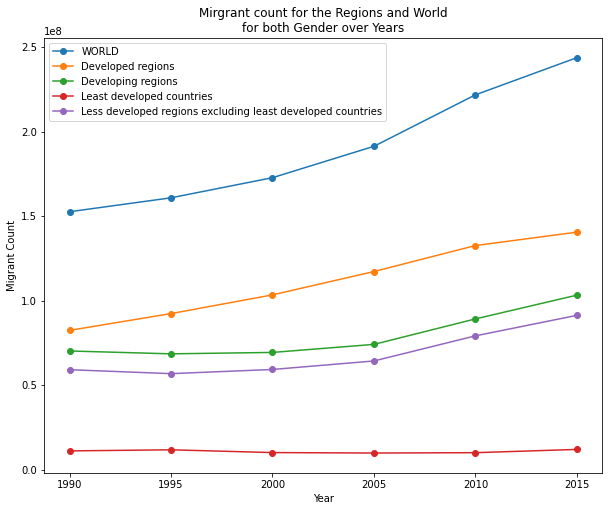

In [14]:
# target data
target_df1 = df1[df1["gender"] == "both"]
years = ["1990", "1995", "2000", "2005","2010","2015"]
regions = df1.head(5)["Major_area_region_country"]
plt.figure(figsize=(10,8))
for region in regions:
  region_data = target_df1[target_df1["Major_area_region_country"] == region]
  plt.plot(years, region_data["stock"].values.reshape(-1,1), label=region, marker="o")
plt.xlabel("Year")
plt.ylabel("Migrant Count")
plt.title("Mirgrant count for the Regions and World\nfor both Gender over Years")
plt.legend()
plt.show()

As a result, we can see that the migrant stock has increases steady from 1995 till 2015 worldwide. Also, we observe that there is a turning point in 2005 where developing regions and least developed regions (except least developed countries) have a significant amount of increase in migrant stock. The total migrant stock worldwide also inclines rapidly. Lastly, we observe no change for the least developed countries. Then we are interested to see how migrant counts are spread out for all the countries or regions. We make a bar plot for each year and for every type of gender to see it. For this plot, we should exclude all regions, since they are the summations of our target values that influence our result.

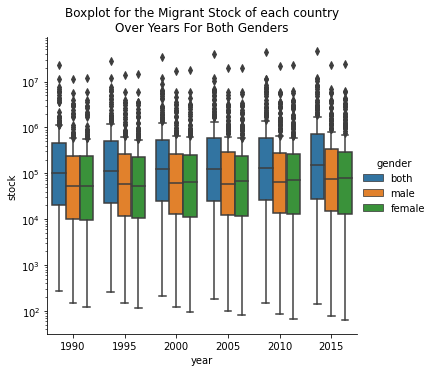

In [15]:
target = df1[df1["Country_code"].astype(int) < 900]
sns.catplot(data=target, kind="box", x="year", y="stock", hue="gender").set(yscale="log")
plt.title("Boxplot for the Migrant Stock of each country\nOver Years For Both Genders")
plt.show()

We applied the log scale to the boxplot above since the difference is significant in scale. After that, we observe that the medians stay close to the middle, however, the plot is in log scale then we suggest that the spread of the migrant stock is heavily left-skewed.  However, we observe there are a lot of countries are counted as outliers from our boxplots. This indicates that some of the counties have much higher migrant stocks than others. Therefore, by making the scale along the y-axis, the plot might be more informative.

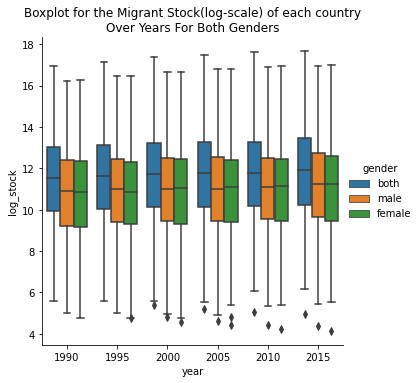

In [16]:
target = df1[df1["Country_code"].astype(int) < 900]
target["log_stock"] = np.log(target["stock"])
sns.catplot(data=target, kind="box", x="year", y="log_stock", hue="gender")
plt.title("Boxplot for the Migrant Stock(log-scale) of each country\nOver Years For Both Genders")
plt.show()

As a result from the above plot with log_stock on the y-axis, we notice that the migrant stock is perfectly normal spreaded. Also, the female migrant stock is slightly lower than male migrant stock over years. Last, we are interested in finding the different between female and male migrant stock of all the major areas for year 1990 and 2015 using histograms.

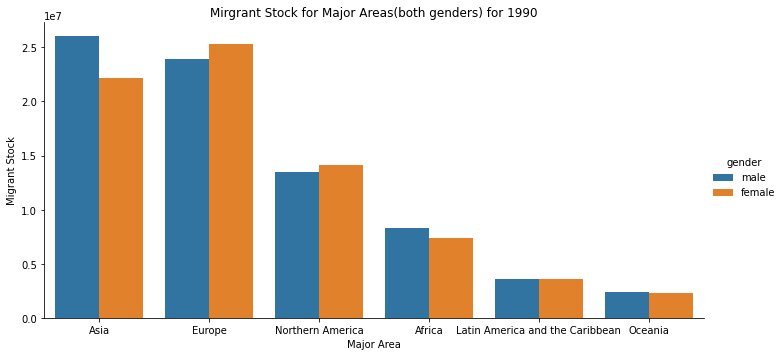

In [17]:
regions = ["Africa", "Asia", "Europe", "Northern America","Latin America and the Caribbean", "Oceania"]
target_data = df1[df1["Major_area_region_country"].isin(regions)].sort_values(by="stock", ascending=False)
target_data = target_data[target_data["gender"].isin(["male", "female"])]

curr = target_data[target_data["year"] == "1990"]
g = sns.catplot(x='Major_area_region_country', y='stock', hue='gender',
            data=curr, kind='bar', aspect=2)
g.set(xlabel='Major Area', ylabel='Migrant Stock')
plt.title("Mirgrant Stock for Major Areas(both genders) for 1990")
plt.show()

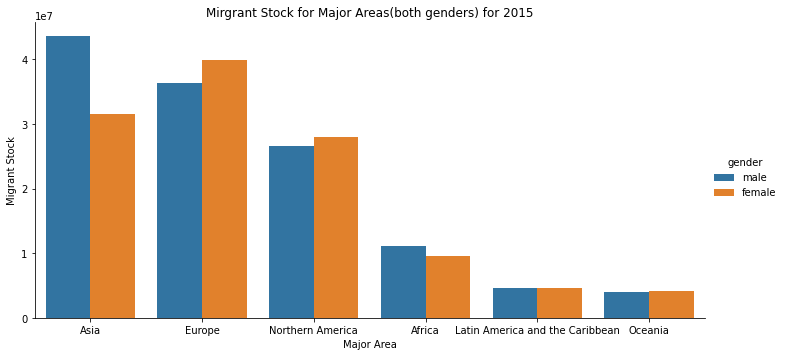

In [18]:
curr = target_data[target_data["year"] == "2015"]
g = sns.catplot(x='Major_area_region_country', y='stock', hue='gender',
            data=curr, kind='bar', aspect=2)
g.set(xlabel='Major Area', ylabel='Migrant Stock')
plt.title("Mirgrant Stock for Major Areas(both genders) for 2015")
plt.show()

Therefore, we observe that there are more male migrants in Asia and Africa, more female migrants in Europe and Northern America. Also, the ratio between gender maintains from 1990 to 2015. 

We will apply the above percedure for the rest of tables in a similar way.

## Table 2

In [19]:
df2["population"] = df2["population"].astype(float)

First we are interested in the population for the world and the 4 regions that have the most population for both gender and for every year. We generate a line plot to show the stock and see the change of spreading over year.



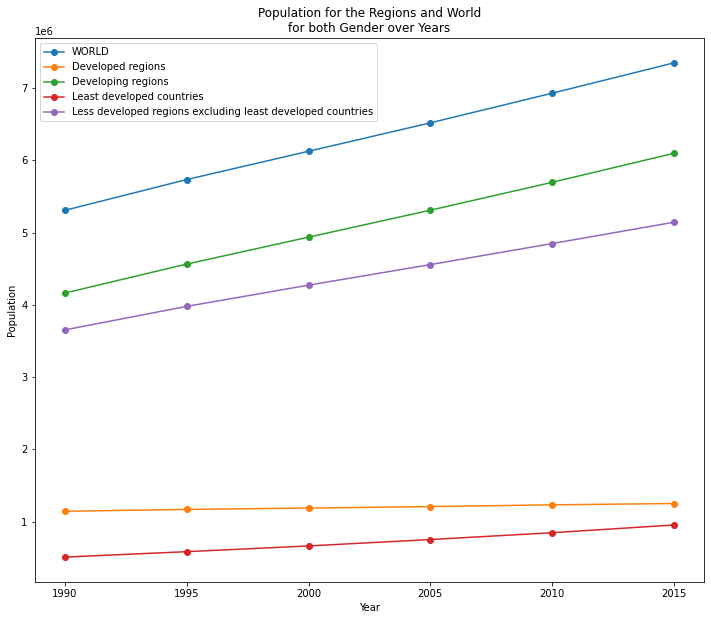

In [20]:
# target data
target_df2 = df2[df2["gender"] == "both"]
years = ["1990", "1995", "2000", "2005","2010","2015"]
regions = df2.head(5)["Major_area_region_country"]
plt.figure(figsize=(12,10))
for region in regions:
  region_data = target_df2[target_df2["Major_area_region_country"] == region]
  plt.plot(years, region_data["population"].values.reshape(-1,1), label=region, marker="o")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population for the Regions and World\nfor both Gender over Years")
plt.legend()
plt.show()

As a result, we see the population around the world and for developing, regions and less developed regions increase consistently. Also, we notice that the population of developed regions holds constant. And the population raises slightly for the least developed countries. Furthermore, we observe a huge gap between the population of developed countries between other regions. To connect with table 1, we notice that although developed regions have a lower population, they still dominate in migrant stock. Then we are interested to see how the population is spread out for all the countries or regions. We make a bar plot for each year and for every type of gender to see it. For this plot, we should exclude all regions, since they are the summations of our target values that influence our result.

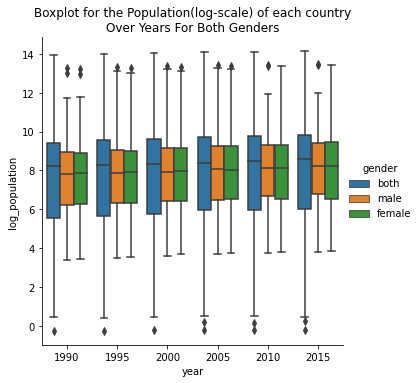

In [21]:
target = df2[df2["Country_code"].astype(int) < 900]
target["log_population"] = np.log(target["population"])
sns.catplot(data=target, kind="box", x="year", y="log_population", hue="gender")
plt.title("Boxplot for the Population(log-scale) of each country\nOver Years For Both Genders")
plt.show()

Similar result can be drawn, we notice that the population is perfectly normal spreaded after log scale. This indicate the original population is also heavily left skewed. Also, the female population is slightly lower than male population over years. Last, we are interested in finding the different between female and male population of all the major areas for year 1990 and 2015 using histograms.

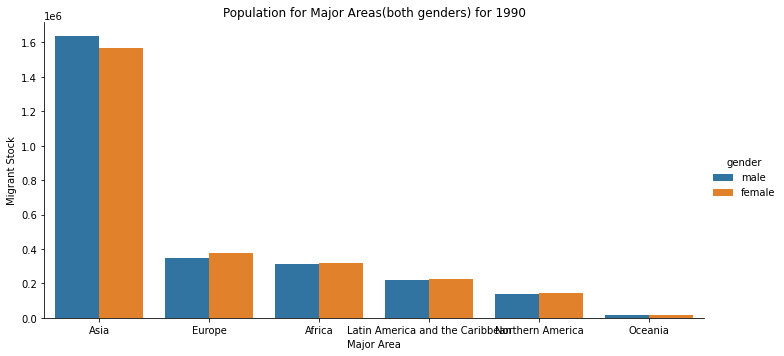

In [22]:
regions = ["Africa", "Asia", "Europe", "Northern America","Latin America and the Caribbean", "Oceania"]
target_data = df2[df2["Major_area_region_country"].isin(regions)].sort_values(by="population", ascending=False)
target_data = target_data[target_data["gender"].isin(["male", "female"])]

curr = target_data[target_data["year"] == "1990"]
g = sns.catplot(x='Major_area_region_country', y='population', hue='gender',
            data=curr, kind='bar', aspect=2)
g.set(xlabel='Major Area', ylabel='Migrant Stock')
plt.title("Population for Major Areas(both genders) for 1990")
plt.show()

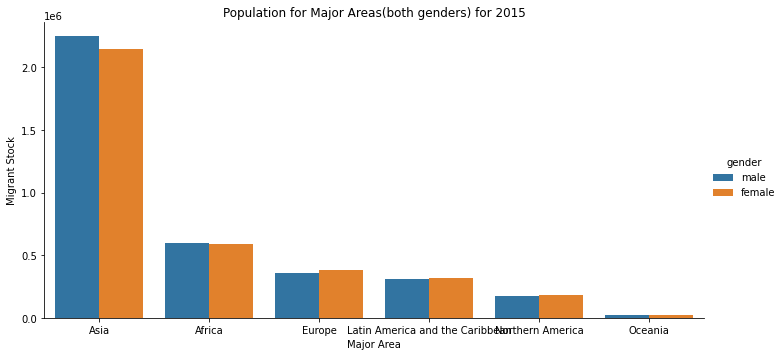

In [23]:
curr = target_data[target_data["year"] == "2015"]
g = sns.catplot(x='Major_area_region_country', y='population', hue='gender',
            data=curr, kind='bar', aspect=2)
g.set(xlabel='Major Area', ylabel='Migrant Stock')
plt.title("Population for Major Areas(both genders) for 2015")
plt.show()

Different from table 1, we do not notice big difference between female and male population except for Asia. Also, there were more female in Afria in 1990 and there were more male instead in 2015.

## Table 3

In [24]:
df3["percentage"] = df3["percentage"].astype(float)

First we are interested in the ratio for migrant stock over population for the world and the 4 regions for both gender and for every year. We generate a line plot to show the stock and see the change of spreading over year.

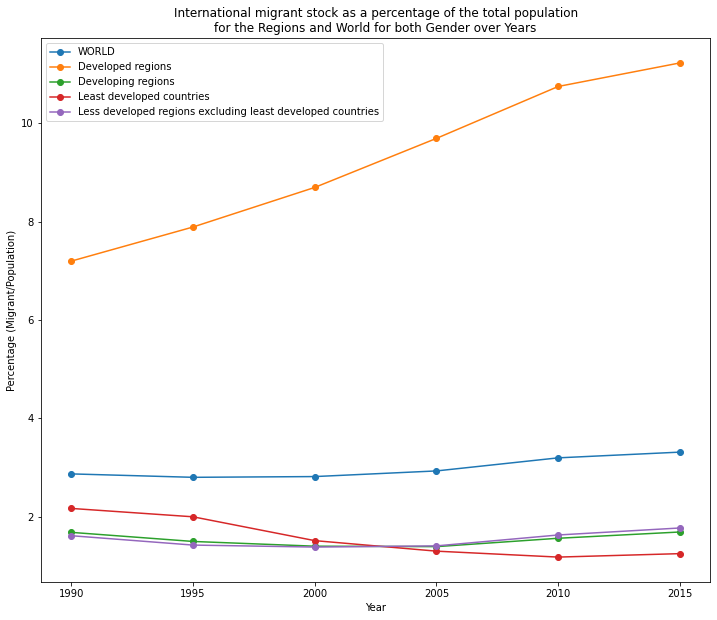

In [25]:
# target data
target_df3 = df3[df3["gender"] == "both"]
years = ["1990", "1995", "2000", "2005","2010","2015"]
regions = df3.head(5)["Major_area_region_country"]
plt.figure(figsize=(12,10))
for region in regions:
  region_data = target_df3[target_df3["Major_area_region_country"] == region]
  plt.plot(years, region_data["percentage"].values.reshape(-1,1), label=region, marker="o")
plt.xlabel("Year")
plt.ylabel("Percentage (Migrant/Population)")
plt.title("International migrant stock as a percentage of the total population\n" +
          "for the Regions and World for both Gender over Years")
plt.legend()
plt.show()

As a result, we see the ratio for developed regions dominates as we suggested in the above part. And the ratio of migrants over population remains the same for the world, and less developed regions and less developing regions. Also, we notice that the ratio drops for least developed countries. Then we are interested to see how migrant rates are spread out for all the countries or regions. We make a bar plot for each year and for every type of gender to see it. For this plot, we should exclude all regions, since they are the summations of our target values that influence our result.

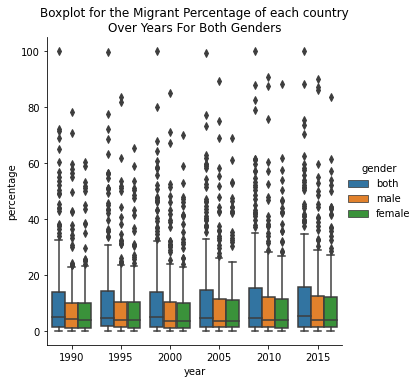

In [26]:
target = df3[df3["Country_code"].astype(int) < 900]
sns.catplot(data=target, kind="box", x="year", y="percentage", hue="gender")
plt.title("Boxplot for the Migrant Percentage of each country\nOver Years For Both Genders")
plt.show()

Since the untransformed data is informative, we notice that the percentage is also heavily left-skewed. This means most countries have a low migrant percentage over the population. Also, male migrant tends to be larger than female. Last, we are interested in finding the difference between the female and male migrant percentages of all the major areas for the year 1990 and 2015 using histograms.

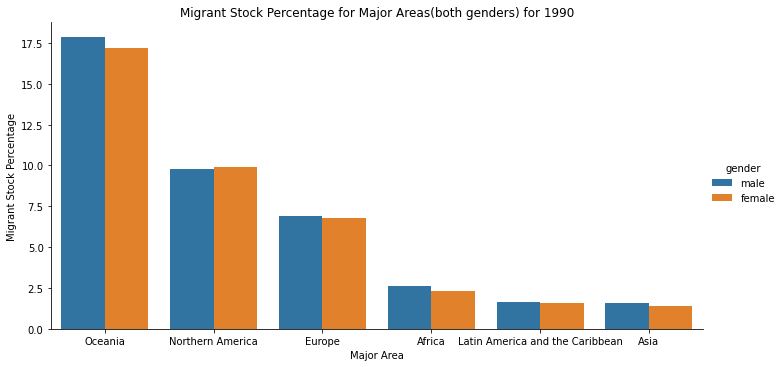

In [27]:
regions = ["Africa", "Asia", "Europe", "Northern America","Latin America and the Caribbean", "Oceania"]
target_data = df3[df3["Major_area_region_country"].isin(regions)].sort_values(by="percentage", ascending=False)
target_data = target_data[target_data["gender"].isin(["male", "female"])]

curr = target_data[target_data["year"] == "1990"]
g = sns.catplot(x='Major_area_region_country', y='percentage', hue='gender',
            data=curr, kind='bar', aspect=2)
g.set(xlabel='Major Area', ylabel='Migrant Stock Percentage')
plt.title("Migrant Stock Percentage for Major Areas(both genders) for 1990")
plt.show()

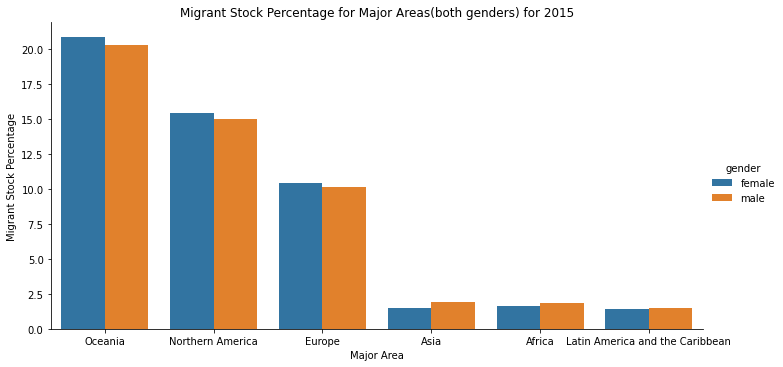

In [28]:
curr = target_data[target_data["year"] == "2015"]
g = sns.catplot(x='Major_area_region_country', y='percentage', hue='gender',
            data=curr, kind='bar', aspect=2)
g.set(xlabel='Major Area', ylabel='Migrant Stock Percentage')
plt.title("Migrant Stock Percentage for Major Areas(both genders) for 2015")
plt.show()

We observe the male tends to have highe migrant percentage than female for large regions.

## Table 4 
The key information of table 4 is to express the ratio of female migrant stock. This information is covered in the analysis for table 1.

## Table 5
Similarly, the information for table 5 is close to that in table 3. We make some useful plots to support our findings in table 3.

In [29]:
df5["annual_rate"] = df5["annual_rate"].astype(float)

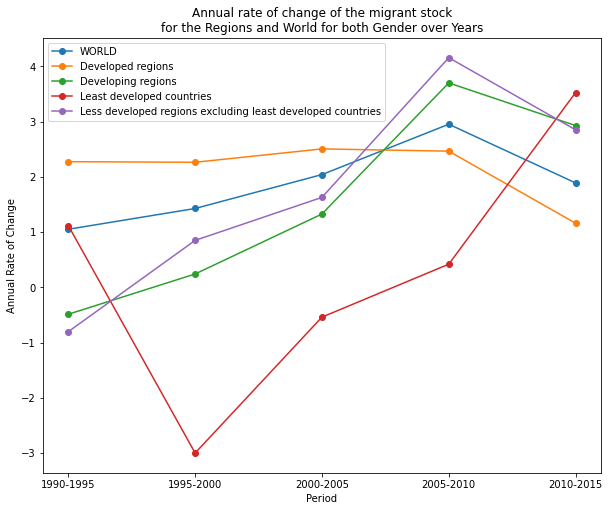

In [30]:
# target data
target_df5 = df5[df5["gender"] == "both"]
years = ["1990-1995", "1995-2000", "2000-2005", "2005-2010","2010-2015"]
regions = df5.head(5)["Major_area_region_country"]
plt.figure(figsize=(10,8))
for region in regions:
  region_data = target_df5[target_df5["Major_area_region_country"] == region]
  plt.plot(years, region_data["annual_rate"].values.reshape(-1,1), label=region, marker="o")
plt.xlabel("Period")
plt.ylabel("Annual Rate of Change")
plt.title("Annual rate of change of the migrant stock\n" + 
          "for the Regions and World for both Gender over Years")
plt.legend()
plt.show()

The above plot tells us more important trends. We notice that the migrant rate of change for least developed countries dropped from around 1% to negative during 1995-2000. However, it increases from 2000 till 2015 and has the highest growth rate in the year 2015. Also, we notice that the rate of change of migrant stock has slightly dropped from 2010 to 2015 for all regions in the world except the least developed countries. Then we are interested to see how the annual rate of change is spread out for all the countries or regions. We make a bar plot for each year and for every type of gender to see it. For this plot, we should exclude all regions, since they are the summations of our target values that influence our result.

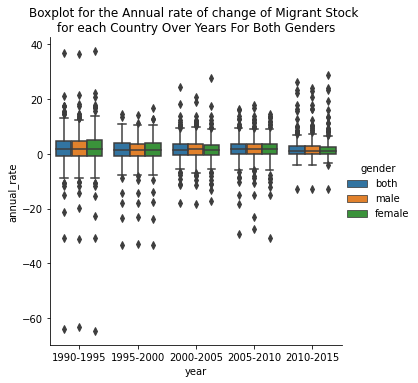

In [31]:
target = df5[df5["Country_code"].astype(int) < 900]
sns.catplot(data=target, kind="box", x="year", y="annual_rate", hue="gender")
plt.title("Boxplot for the Annual rate of change of Migrant Stock \n" + 
          "for each Country Over Years For Both Genders")
plt.show()

The growth rate seems normal than before. We observe that most of the countries have a positive annual rate of change in Migrant stock. Also, the annual rate of change for male is slightly higher. 

## Table 6

We explore the refugees in this table. 

In [32]:
df6_est_refugee["cases"] = df6_est_refugee["cases"].astype(float)

In [33]:
df6_percentage_refugee["cases"] = df6_percentage_refugee["cases"].astype(float)

In [34]:
df6_rate_refugee["cases"] = df6_rate_refugee["cases"].astype(float)

Similar to the analysis for table 1 to table 3. We explore the change in amount, change in percentage and change in growth rate.

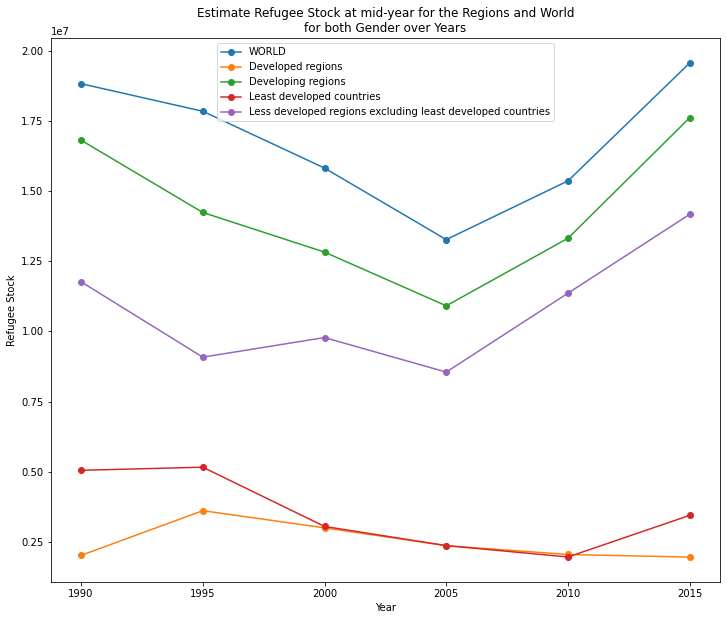

In [35]:
# target data
years = ["1990", "1995", "2000", "2005","2010","2015"]
regions = df3.head(5)["Major_area_region_country"]
plt.figure(figsize=(12,10))
for region in regions:
  region_data = df6_est_refugee[df6_est_refugee["Major_area_region_country"] == region]
  plt.plot(years, region_data["cases"].values.reshape(-1,1), label=region, marker="o")
plt.xlabel("Year")
plt.ylabel("Refugee Stock")
plt.title("Estimate Refugee Stock at mid-year for the Regions and World\n" + 
          "for both Gender over Years")
plt.legend()
plt.show()

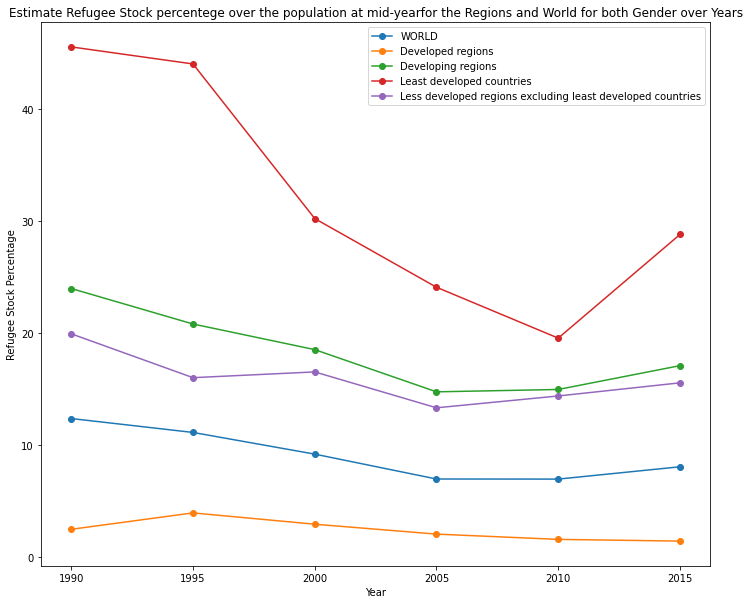

In [36]:
# target data
years = ["1990", "1995", "2000", "2005","2010","2015"]
regions = df3.head(5)["Major_area_region_country"]
plt.figure(figsize=(12,10))
for region in regions:
  region_data = df6_percentage_refugee[df6_percentage_refugee["Major_area_region_country"] == region]
  plt.plot(years, region_data["cases"].values.reshape(-1,1), label=region, marker="o")
plt.xlabel("Year")
plt.ylabel("Refugee Stock Percentage")
plt.title("Estimate Refugee Stock percentege over the population at mid-year" + 
          "for the Regions and World for both Gender over Years")
plt.legend()
plt.show()

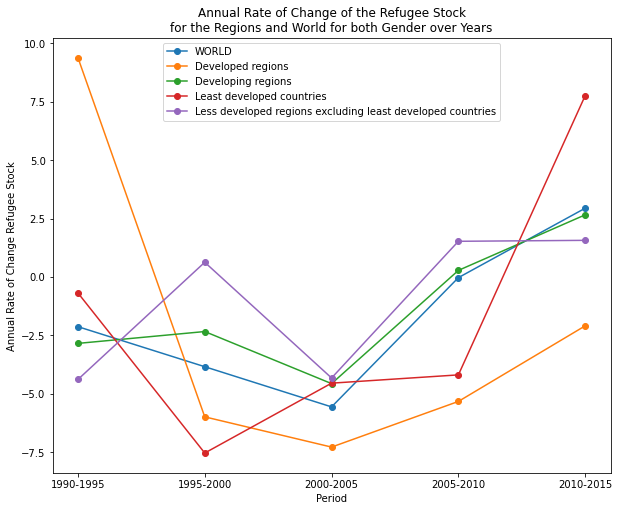

In [37]:
# target data
years = ["1990-1995", "1995-2000", "2000-2005", "2005-2010","2010-2015"]
regions = df5.head(5)["Major_area_region_country"]
plt.figure(figsize=(10,8))
for region in regions:
  region_data = df6_rate_refugee[df6_rate_refugee["Major_area_region_country"] == region]
  plt.plot(years, region_data["cases"].values.reshape(-1,1), label=region, marker="o")
plt.xlabel("Period")
plt.ylabel("Annual Rate of Change Refugee Stock")
plt.title("Annual Rate of Change of the Refugee Stock\n" + 
          "for the Regions and World for both Gender over Years")
plt.legend()
plt.show()

We observe that there are more refugees in less developed regions and developing regions. For these regions, the refugee stock drops from the year 1990 to the year 2000 and increased from the year 2000 to the year 2015. The refugee stock for developed regions and least developed countries remain low over years. As shown from the second plot, the percentage of refugees in the population is decreasing over the year all over the world. Last, the annual rate of change for developed countries and least developed countries drop before the year 2000, and the growth rate turned to increase from 2000 till 2015. And for all regions, we can an increasing growth rate from 2005-2010 to 2010-2015.

# Conclusion

In conclusion, some useful plots are generated to support the study of the dataset. And some key features are shown and important trends are driven for the tables. To begin with, bar plots, box plots, and line plots are used. As per Tufte's visualization principles, we have informative labels for all of the plots that directly reflects the representation of the numbers. Hence the first principle is satisfied. Also, the data of trends are self-explanatory for all of our plots. The ambiguity is well minimized. Hence, the second principle is not violated. Also, we have shown different variations of the dataset. For example, the regions with different levels of development. The contrast between males and females. Also, the changes over the years. Hence, the third principle is satisfied. Moreover, we have time-series boxplots that were not informative with original data. We have applied proper scaling and have the correct label showing that the target value is log scaled. This helps the plots to be more readable and hence agrees with the fourth principle. All the rest of the principles are satisfied, as the dimensions on the plots are much less than that in the data and the size and spread of our plots are tuned such that the maximal performance can be achieved. Hence, our plots follow Tufte's visualization principles. Then we introduce the methods we have used. First, line plots are used to show the difference between years for the target value. This plot helps us to determine the trends over years. Next, bar plots are used to show the spread of the target value. For example, by fitting the boxplot over the migrant stock, we could observe that the migrant count for countries is left skewed which shows most of the countries have low migrant stock. Lastly, a barplot is used to compare and contrast the target value between several interesting regions. Also, bar plots are generated to be multi-bar plots in our scenario since comparing the difference between genders is also important. To conclude with the findings in the above analysis, details have already been covered duration the visualization section. The key findings are the following. First, for most of the dataset, we have found that males overall have slightly higher stock, higher percentages, and higher growth rates than females. Secondly, we notice developed regions have to dominate migrant stock percentage over their population. Moreover, we notice the migrant percentage spread of all countries is left-skewed and is not improved over the year. This indicates that most of the countries have a low level of migrant stock. Lastly, for the refugee dataset, we notice that the count of refugees decreases and then increases. However, the percentage of refugees decreases slightly. This is because the world population keeps increasing. Hence the increasing number of refugees should be taken into consideration. Overall, we have noticed that developed countries tend to have more migrants and fewer refugees, and the distributions are unbalanced. From my perspective, global trading and immigration should be encouraged as it helps with diversity and common prosperity. 